**Acquiring and loading data**

In [1]:
#importing neccessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#using pandas library and 'read_csv' function to read csv file
data = pd.read_csv("../input/heart-disease-uci/heart.csv")
#examining the data
data.head(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
#finding the length of the datset
len(data)

303

In [4]:
#finding the type of every column
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

**Data Exploration**

In [5]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

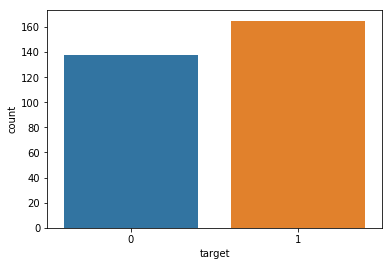

In [6]:
#finding how many patients have heart disease
sns.countplot(x = "target", data =  data)
plt.show()

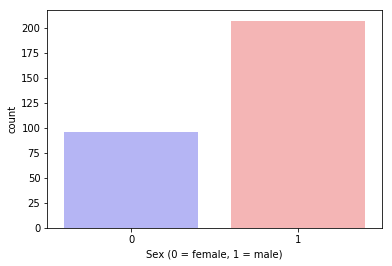

In [7]:
#finding the gender ratio of the patients
sns.countplot(x ='sex', data = data, palette ='bwr')
plt.xlabel("Sex (0 = female, 1 = male)")
plt.show()

In [8]:
x = data.drop('target', 1) #data excluding the labels
y = data['target'] #labels 
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = .2, random_state = 42) #split the data into train and test sets
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape 

((242, 13), (242,), (61, 13), (61,))

In [9]:
model = LogisticRegression() #using logistic regression
model.fit(X_train, Y_train) #fitting the model on training data

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
Y_test_hat = model.predict(X_test) #predicting 
accuracy_score(Y_test, Y_test_hat)

0.8688524590163934

In [11]:
print(classification_report(Y_test, Y_test_hat, digits=6))

              precision    recall  f1-score   support

           0   0.862069  0.862069  0.862069        29
           1   0.875000  0.875000  0.875000        32

    accuracy                       0.868852        61
   macro avg   0.868534  0.868534  0.868534        61
weighted avg   0.868852  0.868852  0.868852        61

